In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import MLP, FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the soybean dataset
raw_df = pd.read_excel("data/Soybean_V103.xlsx")
X = raw_df.values[0::1, 1:]
y = raw_df.values[0::1, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape

((1941, 20), (1941,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1552, 20), (389, 20), (1552,), (389,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# Initialize MLP
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000

mlp = MLP(input_dim, hidden_dim, output_dim,
          learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    mlp, X_train, X_test, y_train, y_test)
results["Custom MLP"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                         "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3530.289729577251
Epoch 100, Loss: 2688.595572731604
Epoch 200, Loss: 1604.4237843362798
Epoch 300, Loss: 628.7567921013989
Epoch 400, Loss: 240.70016936994335
Epoch 500, Loss: 111.90597328789624
Epoch 600, Loss: 78.08242206497323
Epoch 700, Loss: 70.43508753103691
Epoch 800, Loss: 67.11015305593229
Epoch 900, Loss: 66.21971515195828


In [6]:
# Initialize FONN1
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_input = 10
learning_rate = 0.001 # Reduced learning rate for FONN1
epochs = 4000 # Increase epochs for FONN1

fonn1 = FONN1(input_dim, hidden_dim, output_dim, num_trees_input,
              learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    fonn1, X_train, X_test, y_train, y_test)
results["FONN1"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                    "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3300.0742203282443
Epoch 100, Loss: 3021.9639567991944
Epoch 200, Loss: 2836.7958960088677
Epoch 300, Loss: 2723.4932869152112
Epoch 400, Loss: 2612.6106780097184
Epoch 500, Loss: 2504.1480691353845
Epoch 600, Loss: 2398.105460272935
Epoch 700, Loss: 2294.482851416458
Epoch 800, Loss: 2193.2802425634595
Epoch 900, Loss: 2094.4976337126855
Epoch 1000, Loss: 1998.1350248634296
Epoch 1100, Loss: 1904.1924160152612
Epoch 1200, Loss: 1812.6698071679025
Epoch 1300, Loss: 1723.567198321162
Epoch 1400, Loss: 1636.8845894749063
Epoch 1500, Loss: 1552.6219806290371
Epoch 1600, Loss: 1470.779371783483
Epoch 1700, Loss: 1391.3567629381882
Epoch 1800, Loss: 1314.3541540931083
Epoch 1900, Loss: 1239.7715452482096
Epoch 2000, Loss: 1167.6089364034642
Epoch 2100, Loss: 1097.86632755885
Epoch 2200, Loss: 1030.5437187143484
Epoch 2300, Loss: 965.6411098699434
Epoch 2400, Loss: 903.1585010256216
Epoch 2500, Loss: 843.0958921813701
Epoch 2600, Loss: 785.4532833371813
Epoch 2700, Loss: 730.2

In [7]:
# Initialize FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.01

fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden,
              learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    fonn2, X_train, X_test, y_train, y_test)
results["FONN2"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                    "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 51536.962466725636
Epoch 100, Loss: 62.557318651161225
Epoch 200, Loss: 62.70178957440592
Epoch 300, Loss: 62.79841459413027
Epoch 400, Loss: 63.05440197786819
Epoch 500, Loss: 63.37640148537928
Epoch 600, Loss: 63.62839075470381
Epoch 700, Loss: 63.855760749838325
Epoch 800, Loss: 63.99141122757491
Epoch 900, Loss: 64.06649565398163


In [8]:
# Initialize TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000

treenn1 = TREENN1(input_dim, hidden_dim, output_dim, learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    treenn1, X_train, X_test, y_train, y_test)
results["TREENN1"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                      "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3737.807195434428
Epoch 100, Loss: 2349.720824698401
Epoch 200, Loss: 1433.6241922819856
Epoch 300, Loss: 759.5275602984804
Epoch 400, Loss: 327.4309283464496
Epoch 500, Loss: 137.33429614740322
Epoch 600, Loss: 120.66852078377119
Epoch 700, Loss: 120.04569120682045
Epoch 800, Loss: 114.44714097454381
Epoch 900, Loss: 114.23201202886465


In [9]:
# Initialize TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.001
epochs = 4000 # Increase epochs

treenn2 = TREENN1(input_dim, hidden_dim, output_dim,
                  learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    treenn2, X_train, X_test, y_train, y_test)
results["TREENN2"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                      "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 2626.7577221870356
Epoch 100, Loss: 2515.6116959277842
Epoch 200, Loss: 2409.310704996454
Epoch 300, Loss: 2305.4297465898317
Epoch 400, Loss: 2203.9687890407895
Epoch 500, Loss: 2104.927831736782
Epoch 600, Loss: 2008.3068745383898
Epoch 700, Loss: 1914.105917395606
Epoch 800, Loss: 1822.3249602858616
Epoch 900, Loss: 1732.9640031974077
Epoch 1000, Loss: 1646.0230461234946
Epoch 1100, Loss: 1561.502089059952
Epoch 1200, Loss: 1479.4011320040577
Epoch 1300, Loss: 1399.720174953953
Epoch 1400, Loss: 1322.459217908321
Epoch 1500, Loss: 1247.6182608662004
Epoch 1600, Loss: 1175.1973038268698
Epoch 1700, Loss: 1105.1963467897733
Epoch 1800, Loss: 1037.6153897544752
Epoch 1900, Loss: 972.4544327206221
Epoch 2000, Loss: 909.7134756879237
Epoch 2100, Loss: 849.3925186561405
Epoch 2200, Loss: 791.4915616250631
Epoch 2300, Loss: 736.0106045945056
Epoch 2400, Loss: 682.9496475642987
Epoch 2500, Loss: 632.3086905342843
Epoch 2600, Loss: 584.0877335043069
Epoch 2700, Loss: 538.28677

In [10]:
# # Measure computational time and predict house prices using the decision trees in the hidden layer
# start_time = time.time()
# fonn2_tree_predictions = fonn2.tree_predict(X_test)
# end_time = time.time()
# fonn2_tree_comp_time = end_time - start_time

# fonn2_tree_r2 = r2_score(y_test, fonn2_tree_predictions)
# fonn2_tree_mae = mean_absolute_error(y_test, fonn2_tree_predictions)
# fonn2_tree_mse = mean_squared_error(y_test, fonn2_tree_predictions)

# results["Tree-based Predictions (FONN2)"] = {"R² Score": fonn2_tree_r2, "MAE": fonn2_tree_mae,
#                                              "MSE": fonn2_tree_mse, "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_tree_comp_time}

In [11]:
# # Combine 10 decision trees and evaluate the ensemble model
# start_time = time.time()
# trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(
#     X_train, y_train) for i in range(10)]
# end_time = time.time()
# ensemble_train_time = end_time - start_time

# start_time = time.time()
# ensemble_predictions = np.mean(
#     [tree.predict(X_test) for tree in trees], axis=0)
# end_time = time.time()
# ensemble_comp_time = end_time - start_time

# ensemble_r2 = r2_score(y_test, ensemble_predictions)
# ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
# ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

# results["Ensemble of 10 Trees"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae,
#                                    "MSE": ensemble_mse, "Train Time (s)": ensemble_train_time, "Comp Time (s)": ensemble_comp_time}

In [12]:
# # Measure computational time and predict house prices using the decision tree in the hidden layer
# start_time = time.time()
# treenn2_tree_predictions = treenn2.tree_hidden.predict(X_test)
# end_time = time.time()
# treenn2_tree_comp_time = end_time - start_time

# treenn2_tree_r2 = r2_score(y_test, treenn2_tree_predictions)
# treenn2_tree_mae = mean_absolute_error(y_test, treenn2_tree_predictions)
# treenn2_tree_mse = mean_squared_error(y_test, treenn2_tree_predictions)

# results["Tree-based Predictions (TREENN2)"] = {"R² Score": treenn2_tree_r2, "MAE": treenn2_tree_mae,
#                                                "MSE": treenn2_tree_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_tree_comp_time}

In [13]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                    R² Score           MAE           MSE  \
Linear Regression              -7.092971e+15  6.813896e+07  9.030474e+17   
Ridge Regression                2.573236e-01  7.687069e+00  9.455446e+01   
Lasso Regression                6.737736e-02  8.701599e+00  1.187376e+02   
ElasticNet Regression           8.234170e-02  8.615870e+00  1.168324e+02   
Bayesian Ridge Regression       2.572114e-01  7.687342e+00  9.456874e+01   
ARD Regression                  2.442973e-01  7.742429e+00  9.621291e+01   
SGD Regressor                   1.319230e-01  7.980560e+00  1.105199e+02   
Passive Aggressive Regressor   -4.872042e-01  1.080362e+01  1.893446e+02   
Support Vector Regression       3.543345e-01  6.851719e+00  8.220343e+01   
MLP Regressor                  -8.621318e-01  6.872751e+00  2.370788e+02   
Random Forest Regressor         6.724457e-01  4.944575e+00  4.170284e+01   
Gradient Boosting Regressor     6.415143e-01  5.228269e+00  4.564090e+01   
XGBoost Regr

Tree 0 feature importances:
[0.36530061 0.02860738 0.05417944 0.0763028  0.02005449 0.
 0.         0.0421175  0.         0.         0.         0.
 0.09158249 0.20063702 0.         0.         0.         0.
 0.12121827 0.        ]
Tree 0 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_1 <= 0.45
|   |   |   |   |   |--- value: [60.49]
|   |   |   |   |--- feature_1 >  0.45
|   |   |   |   |   |--- value: [70.80]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feature_1 >  0.72
|   |   |   |   |   |--- value: [60.65]
|   |   |   |--- feature_4 >  4.99
|   |   |   |   |-

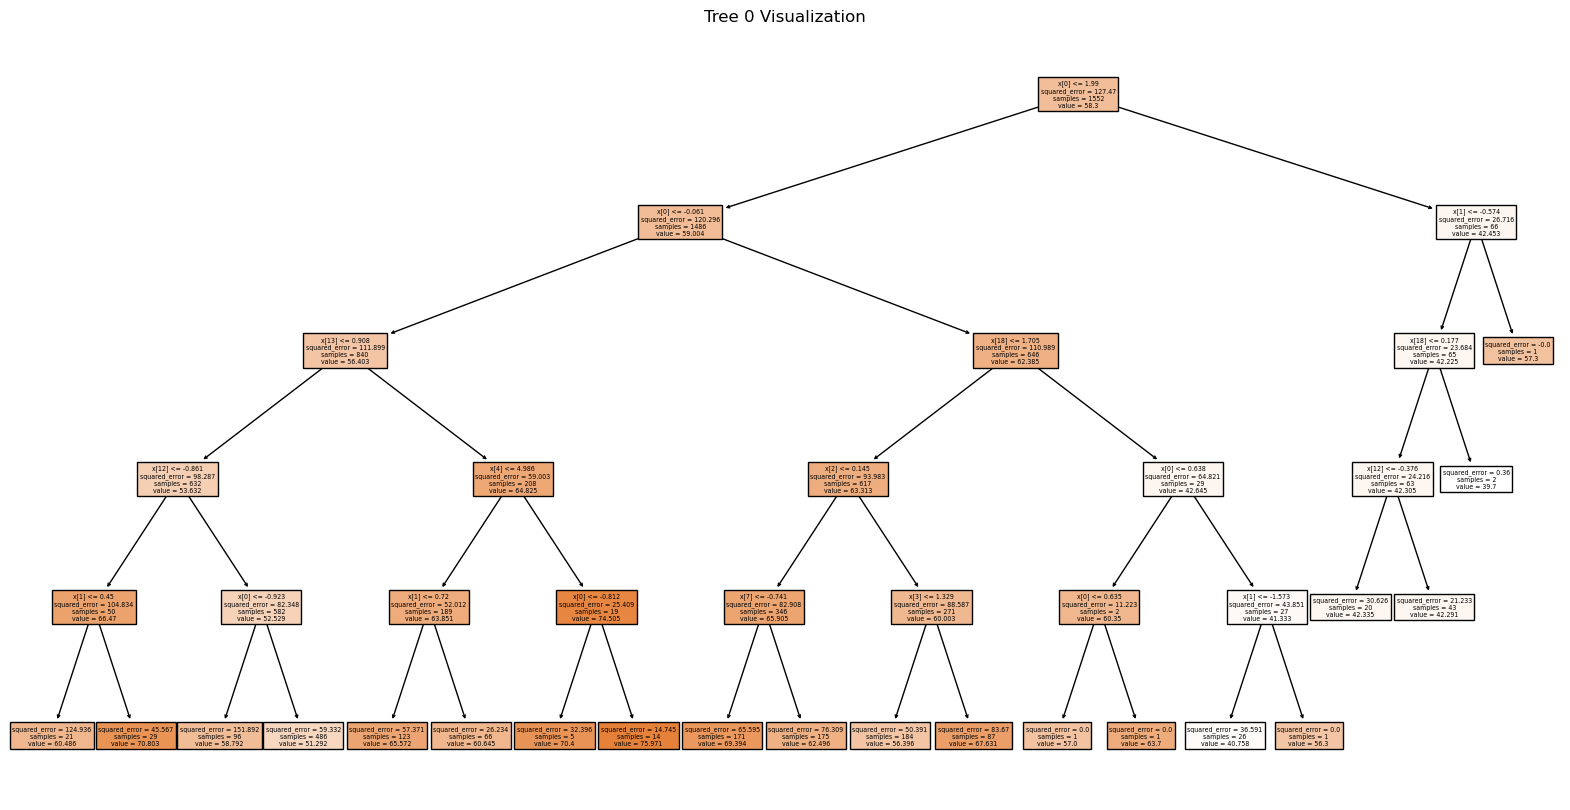

Tree 1 feature importances:
[3.80720987e-01 1.31869997e-02 5.41794376e-02 7.63028047e-02
 2.00544899e-02 0.00000000e+00 0.00000000e+00 4.22520985e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.15822141e-02 2.00637023e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21083671e-01 2.74188967e-07]
Tree 1 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feat

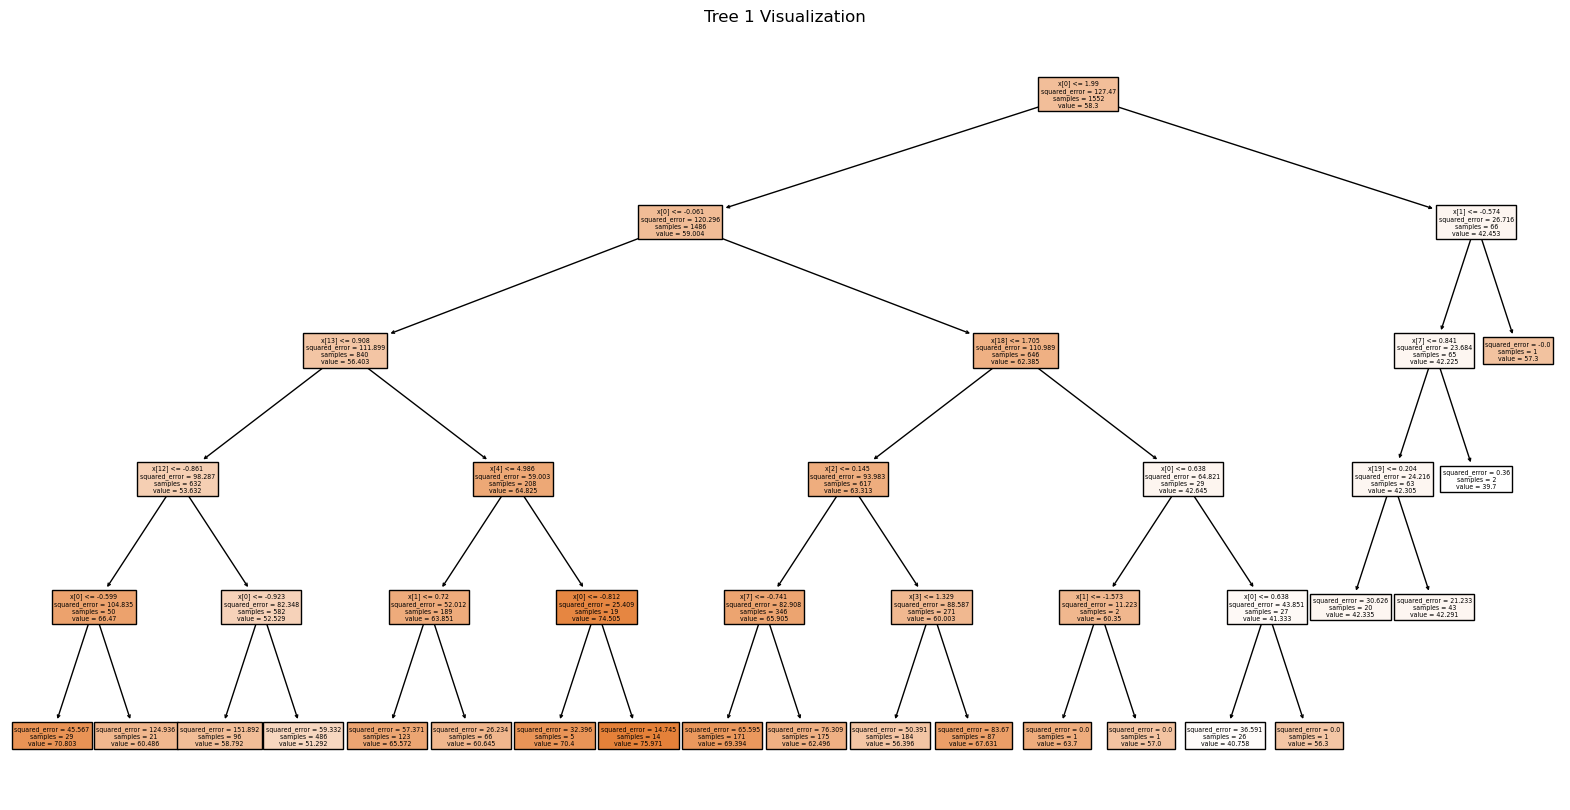

Tree 2 feature importances:
[3.63900560e-01 3.00074270e-02 5.41794376e-02 7.64374008e-02
 2.00544899e-02 0.00000000e+00 0.00000000e+00 4.21175024e-02
 0.00000000e+00 2.74188967e-07 0.00000000e+00 0.00000000e+00
 9.15822141e-02 2.00637023e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21083671e-01 0.00000000e+00]
Tree 2 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_1 <= 0.45
|   |   |   |   |   |--- value: [60.49]
|   |   |   |   |--- feature_1 >  0.45
|   |   |   |   |   |--- value: [70.80]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- featur

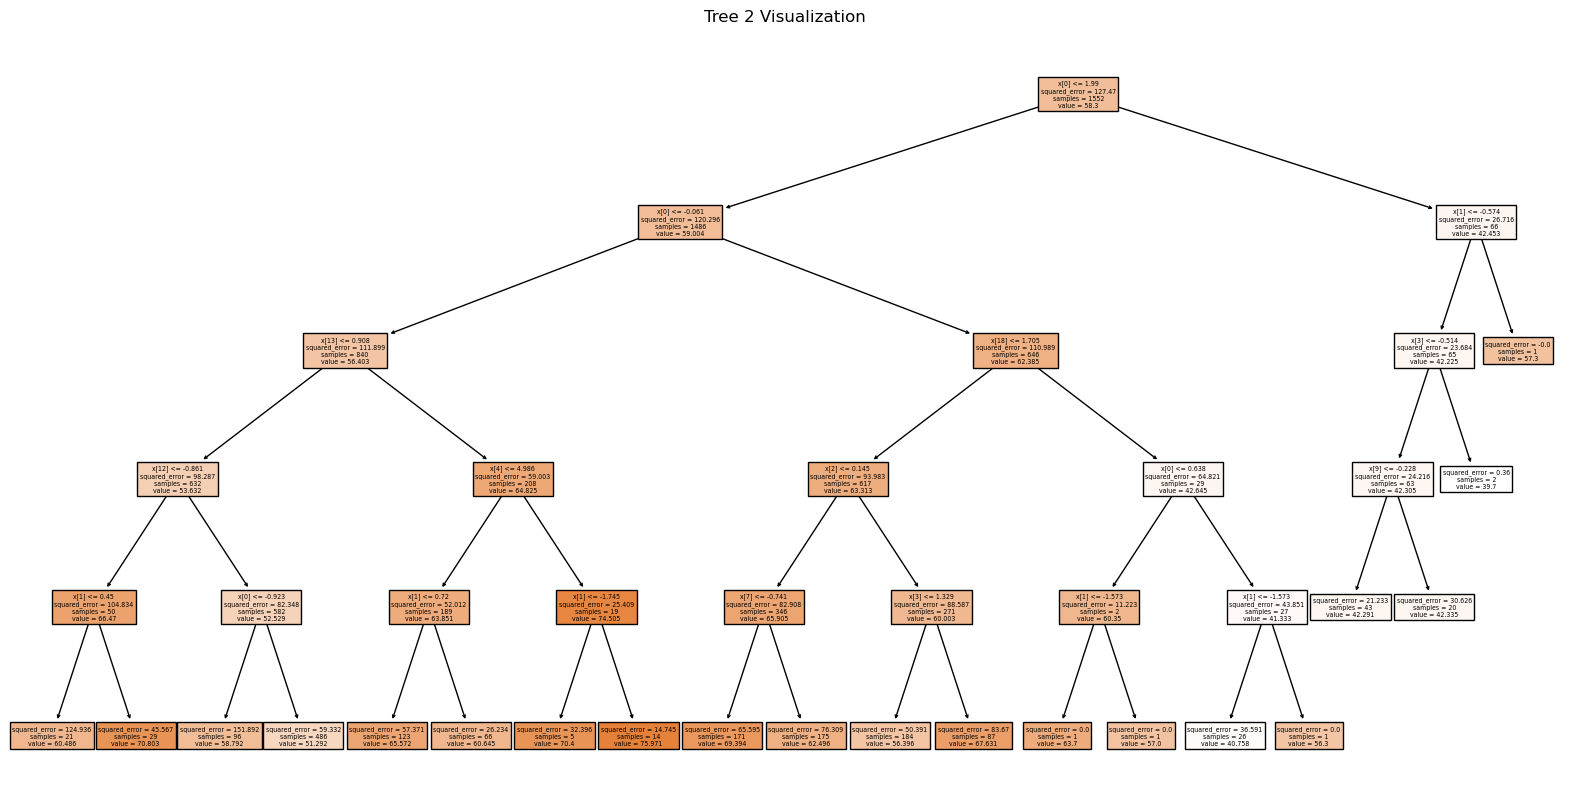

Tree 3 feature importances:
[0.37717035 0.01673791 0.05417944 0.0763028  0.02005449 0.
 0.         0.0421175  0.         0.         0.         0.
 0.09158221 0.20063702 0.         0.         0.         0.
 0.12121827 0.        ]
Tree 3 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feature_1 >  0.72
|   |   |   |   |   |--- value: [60.65]
|   |   |   |--- feature_4 >  4.99
|   |   |   |   

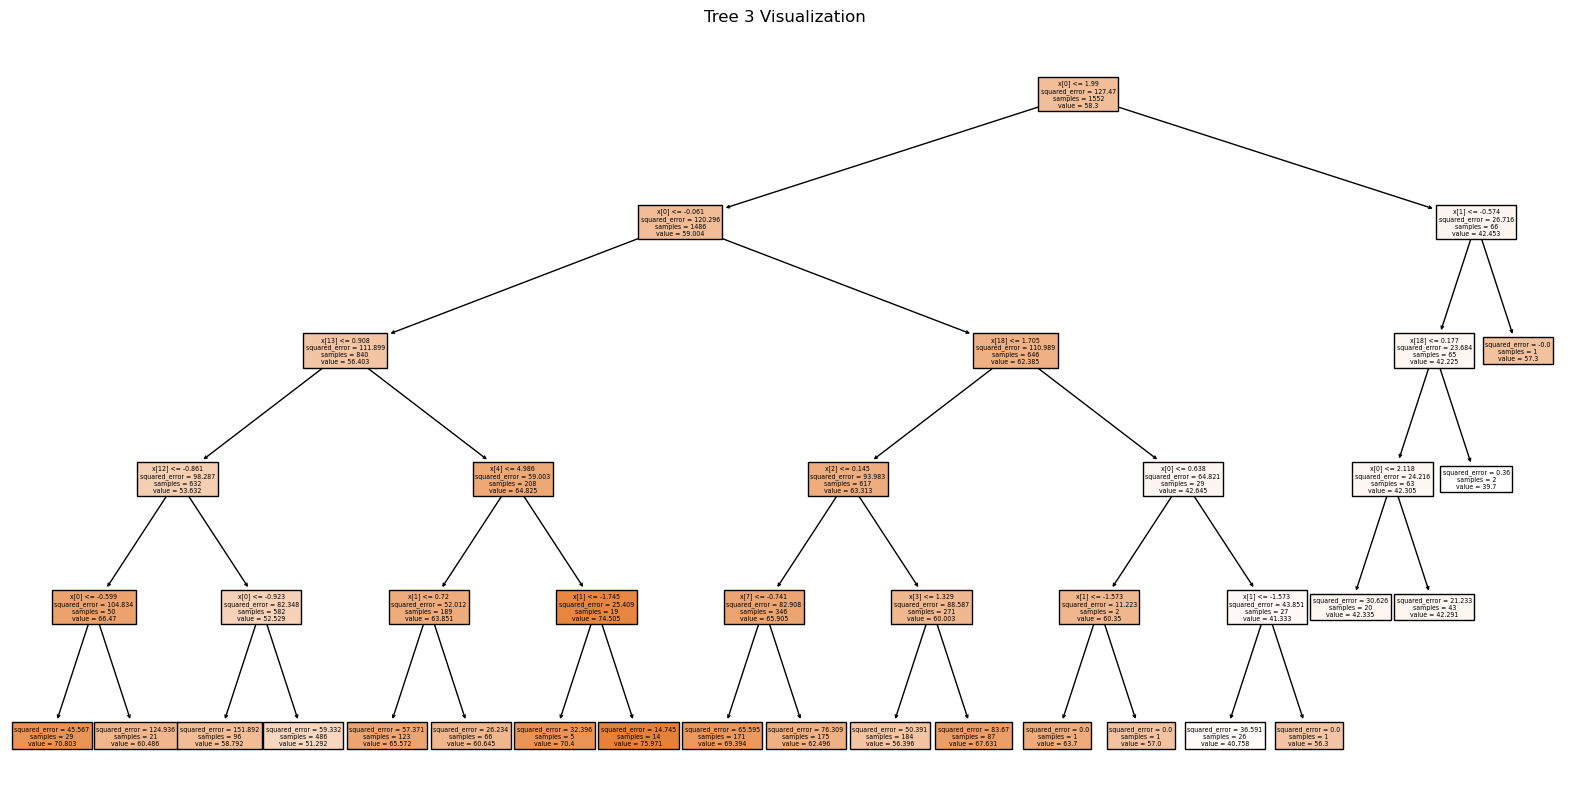

Tree 4 feature importances:
[0.38072099 0.013187   0.05417944 0.0763028  0.02005449 0.
 0.         0.04211778 0.         0.         0.         0.
 0.09171681 0.20063702 0.         0.         0.         0.
 0.12108367 0.        ]
Tree 4 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feature_1 >  0.72
|   |   |   |   |   |--- value: [60.65]
|   |   |   |--- feature_4 >  4.99
|   |   |   |   

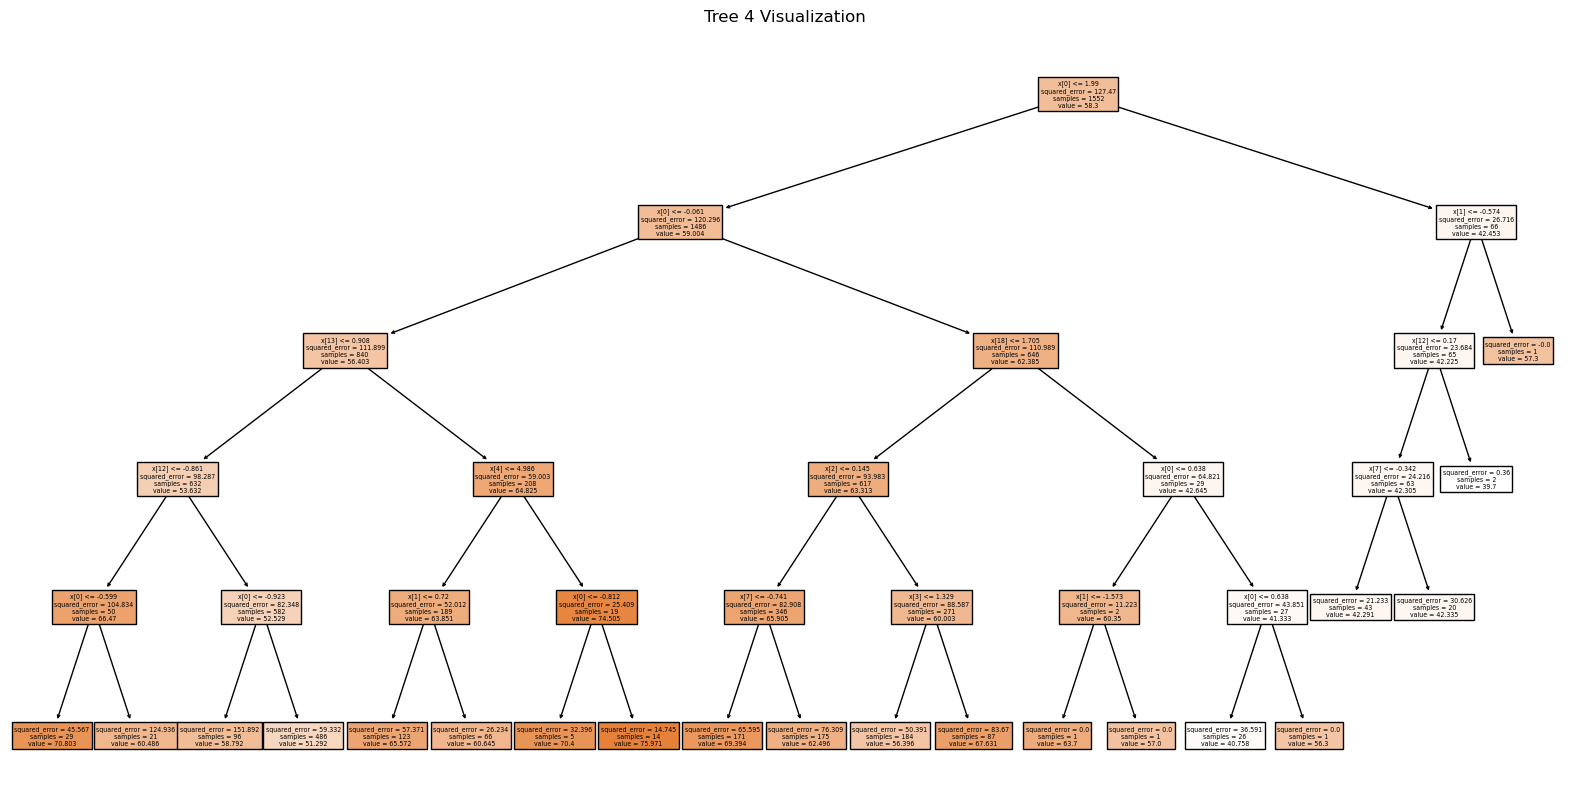

Tree 5 feature importances:
[3.77399771e-01 1.65082159e-02 5.41794376e-02 7.63030789e-02
 2.00544899e-02 0.00000000e+00 1.34596038e-04 4.21175024e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.15822141e-02 2.00637023e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21083671e-01 0.00000000e+00]
Tree 5 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feat

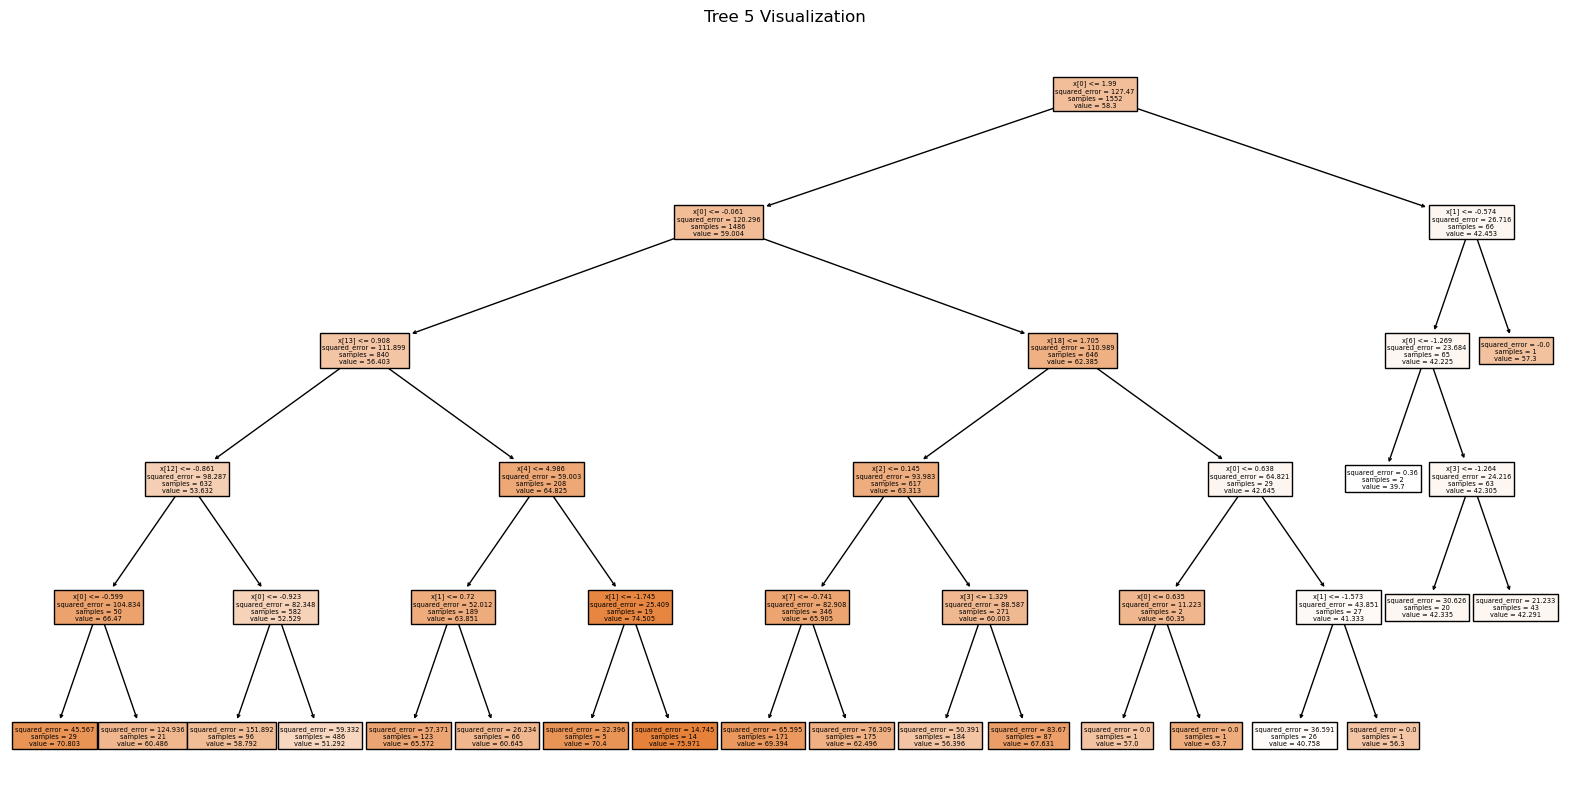

Tree 6 feature importances:
[3.79780334e-01 1.41276532e-02 5.41794376e-02 7.63028047e-02
 2.00544899e-02 0.00000000e+00 0.00000000e+00 4.21175024e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.17168102e-02 2.00637023e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21083671e-01 2.74188968e-07]
Tree 6 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feat

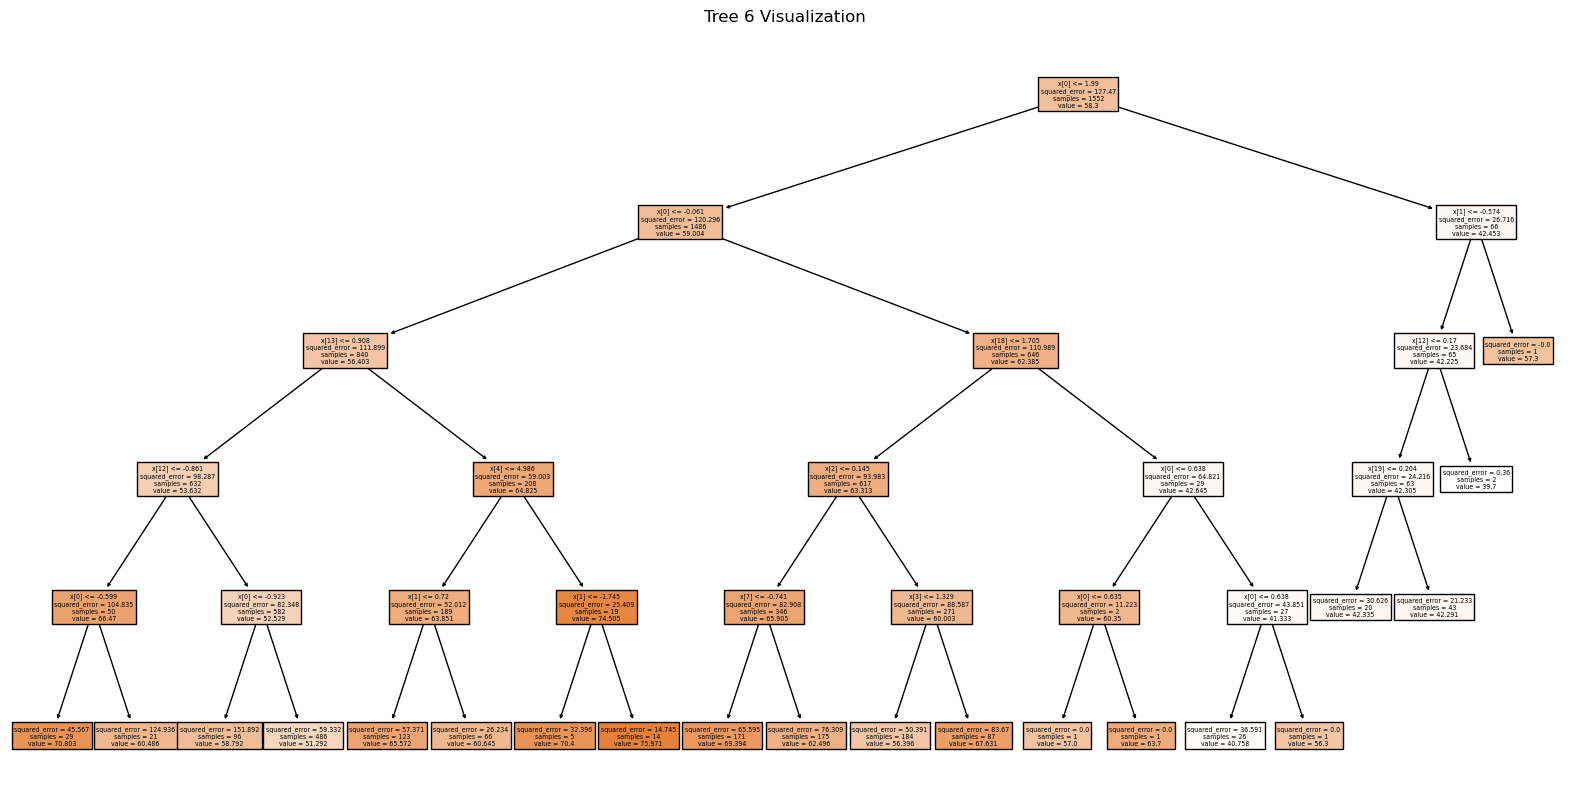

Tree 7 feature importances:
[3.80720987e-01 1.31872739e-02 5.41794376e-02 7.63028047e-02
 2.00544899e-02 0.00000000e+00 0.00000000e+00 4.21175024e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.15822141e-02 2.00637023e-01 0.00000000e+00 0.00000000e+00
 1.34596038e-04 0.00000000e+00 1.21083671e-01 0.00000000e+00]
Tree 7 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feat

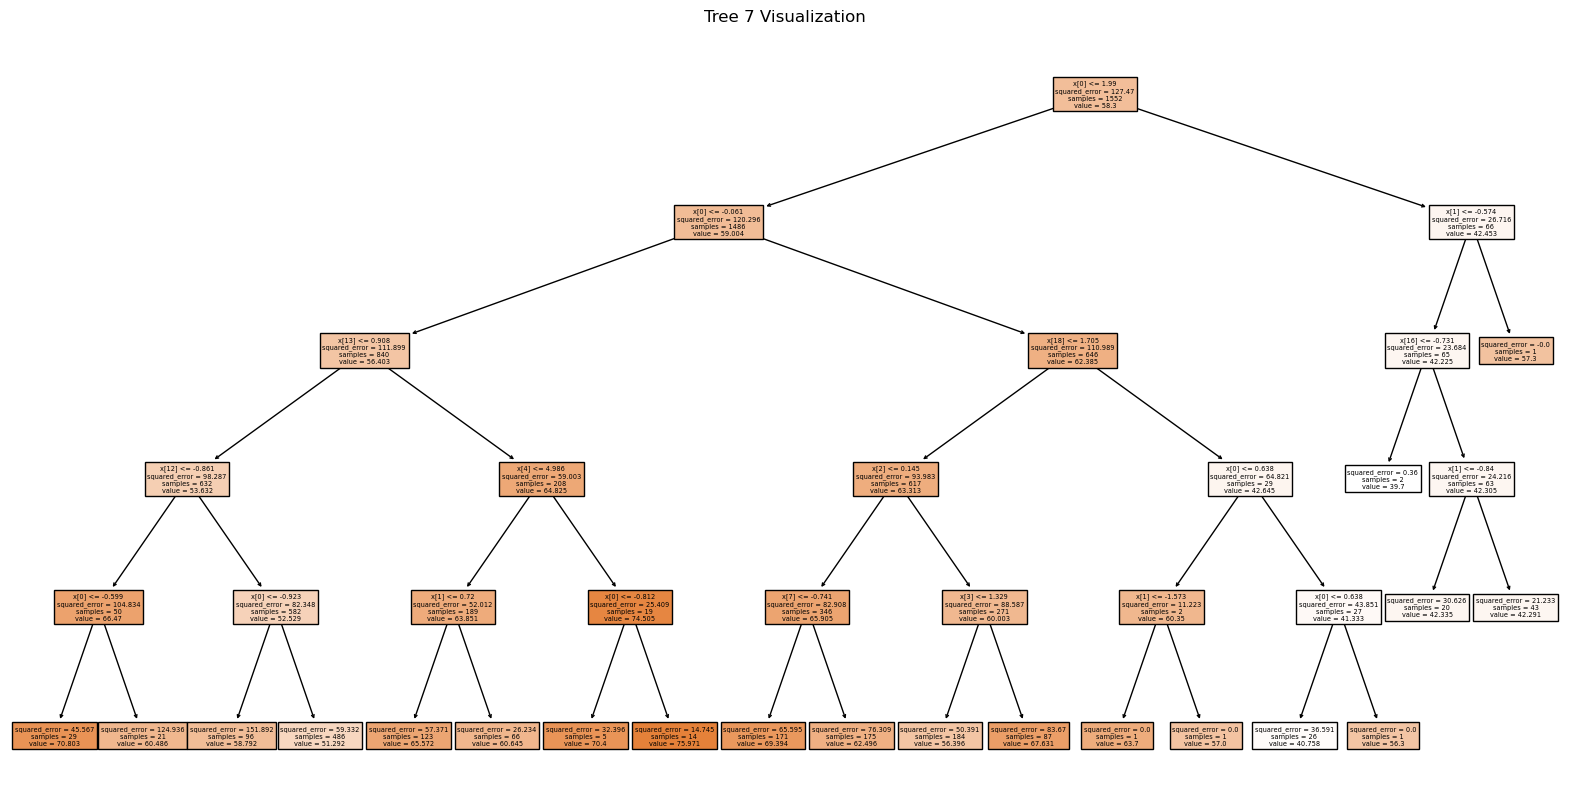

Tree 8 feature importances:
[0.37870472 0.01533786 0.05417944 0.0763028  0.02005449 0.
 0.         0.0421175  0.         0.         0.         0.
 0.09158221 0.20063702 0.         0.         0.         0.
 0.12108394 0.        ]
Tree 8 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feature_1 >  0.72
|   |   |   |   |   |--- value: [60.65]
|   |   |   |--- feature_4 >  4.99
|   |   |   |   

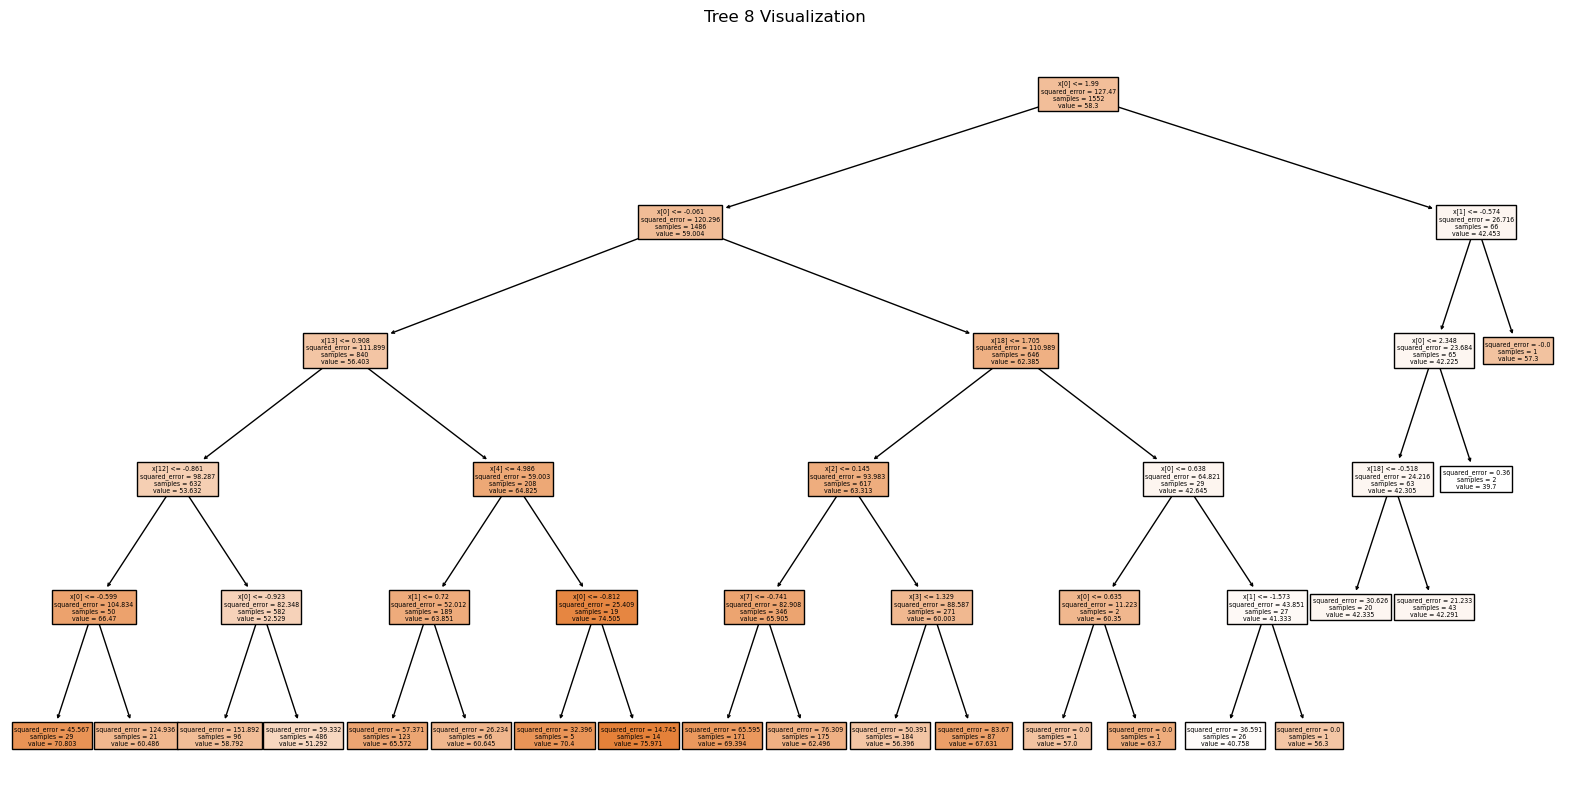

Tree 9 feature importances:
[0.38072099 0.013187   0.05417944 0.0764374  0.02005449 0.
 0.         0.04211778 0.         0.         0.         0.
 0.09158221 0.20063702 0.         0.         0.         0.
 0.12108367 0.        ]
Tree 9 structure:
|--- feature_0 <= 1.99
|   |--- feature_0 <= -0.06
|   |   |--- feature_13 <= 0.91
|   |   |   |--- feature_12 <= -0.86
|   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |--- value: [70.80]
|   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |--- value: [60.49]
|   |   |   |--- feature_12 >  -0.86
|   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |--- value: [58.79]
|   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |--- value: [51.29]
|   |   |--- feature_13 >  0.91
|   |   |   |--- feature_4 <= 4.99
|   |   |   |   |--- feature_1 <= 0.72
|   |   |   |   |   |--- value: [65.57]
|   |   |   |   |--- feature_1 >  0.72
|   |   |   |   |   |--- value: [60.65]
|   |   |   |--- feature_4 >  4.99
|   |   |   |   

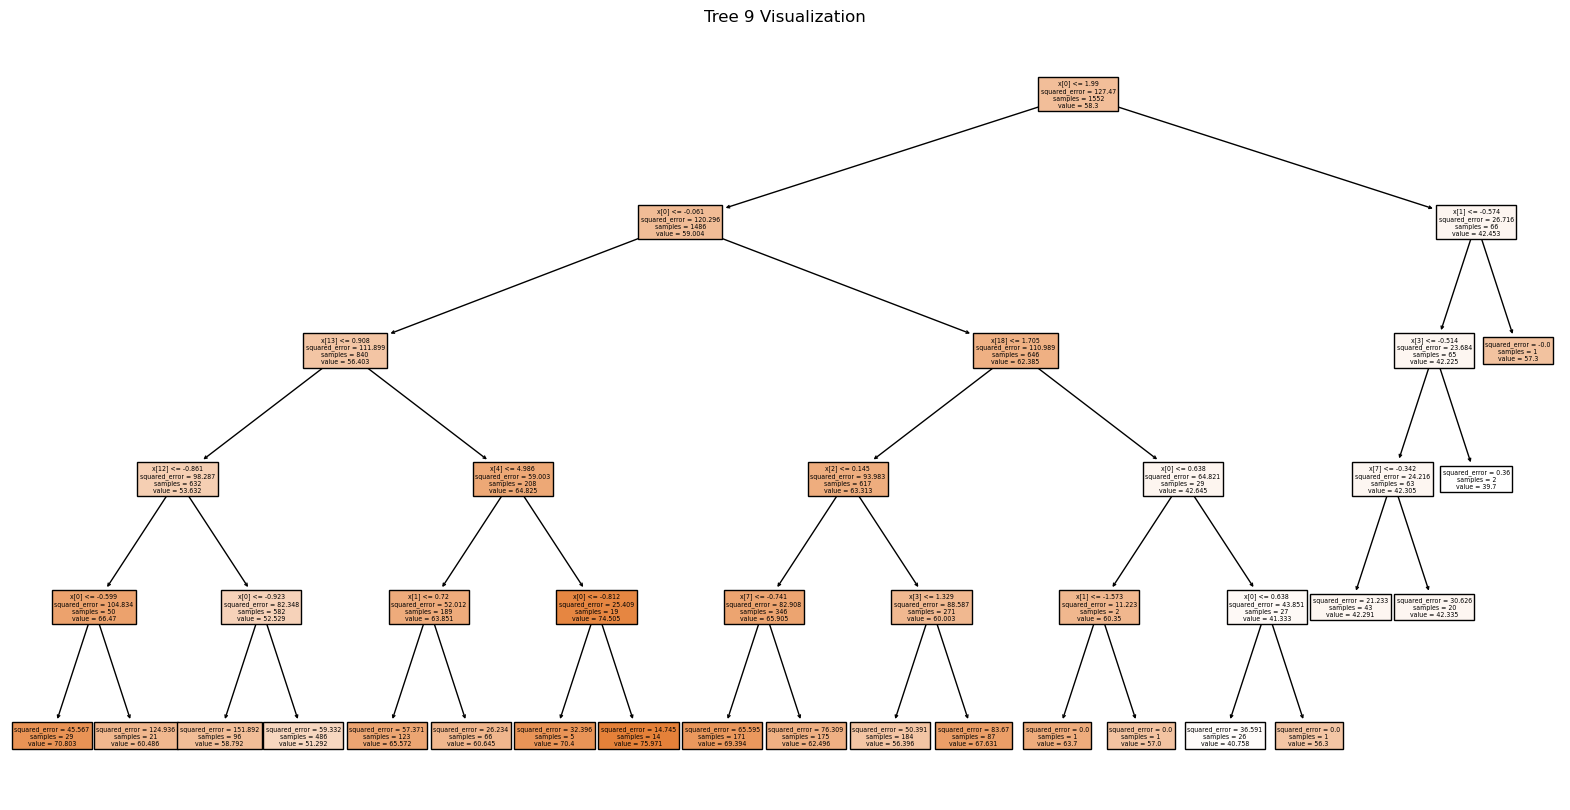

In [14]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()